In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../utilities')

import utilities as util
import augmentations as aug
import visualization as viz
from training_utilities import TrainingMetrics, TrainingTimer
import glob
from astropy.io import fits
from random import randint
import matplotlib.pyplot as plt

2023-12-19 16:28:47.532993: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-19 16:28:47.554781: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 16:28:47.554801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 16:28:47.555403: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 16:28:47.559482: I tensorflow/core/platform/cpu_feature_guar

Add two functions, one to retrieve input and GT and the other to retrieve input GT and prediction

In [72]:
train_images_list = glob.glob('../Results/LWIRISEG/Results/*Train*.fits')
val_images_list = glob.glob('../Results/LWIRISEG/Results/*Val*.fits')
print(len(train_images_list))
print(len(val_images_list))

200
200


In [73]:
train_fits = [util.open_fits_with_mask_and_pred(filename=f, DR=1) for f in train_images_list]
val_fits = [util.open_fits_with_mask_and_pred(filename=f, DR=1) for f in val_images_list]

Look manually for good images

In [75]:
indx = 0

In [116]:
indx-=1

40
41
42
43
44


/home/wassim/Projects/kelian/infrared-cloud-detection/notebooks/../utilities/visualization.py:166: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


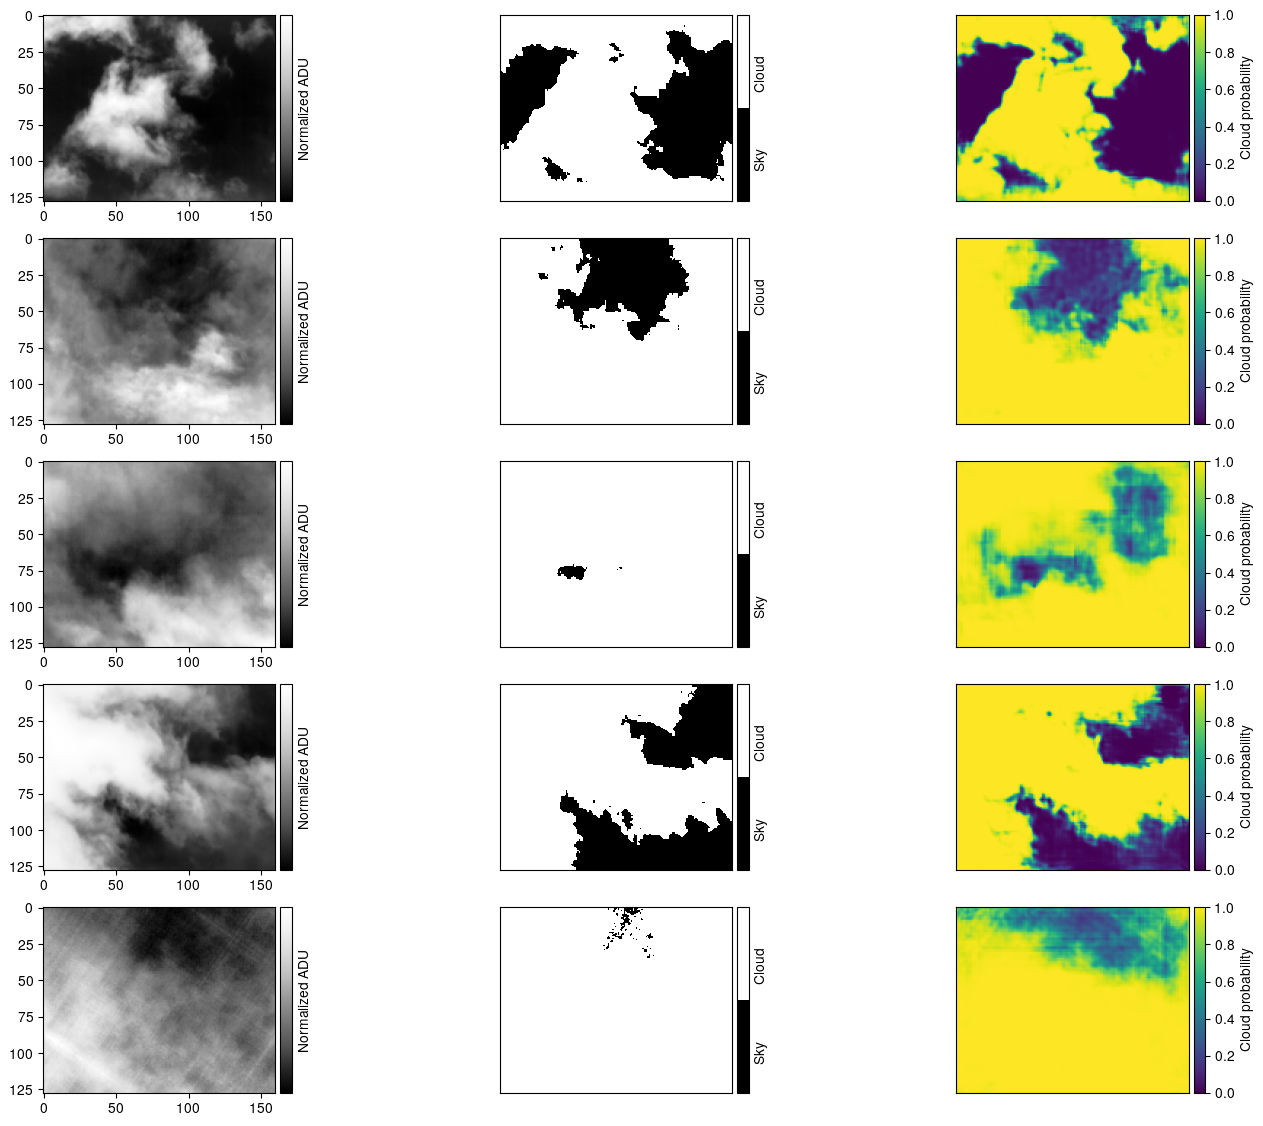

: 

In [120]:
indx = indx + 1
nb = indx*5
print(nb-5)
print(nb-4)
print(nb-3)
print(nb-2)
print(nb-1)
viz.plot_image_preds(train_fits[nb-5:nb],figsize_per_row=(16,14), output_path=None)


/home/wassim/Projects/kelian/infrared-cloud-detection/notebooks/../utilities/visualization.py:166: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


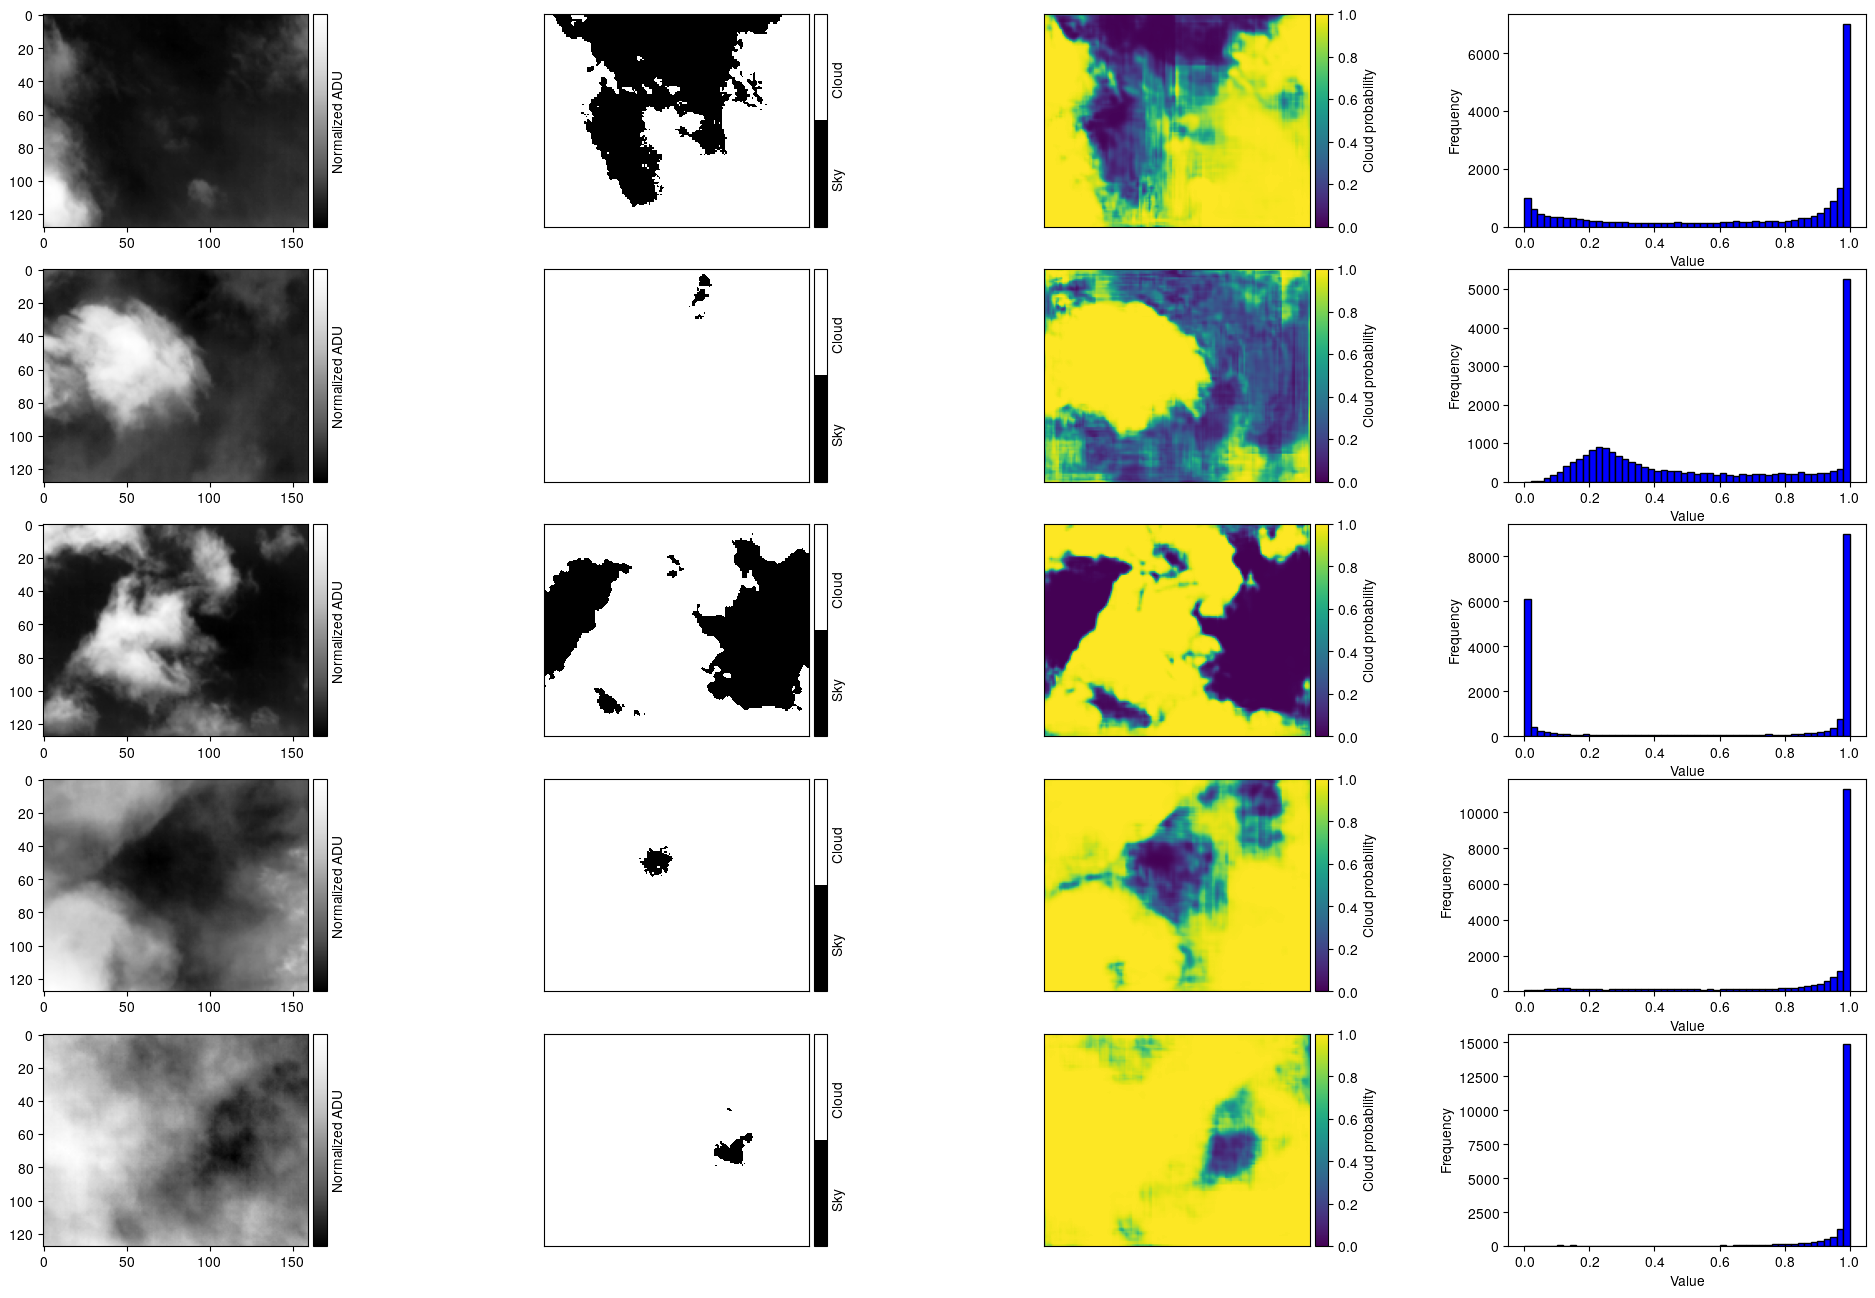

In [65]:
viz.plot_image_preds(data_list=[train_fits[4], train_fits[189], train_fits[171],train_fits[181],train_fits[17]],figsize_per_row=(24,16),predmask_cmap='viridis', output_path=None, include_histogram=True)

In [30]:
viz.plot_image_preds(data_tdata_listuple=[train_fits[4], train_fits[189], train_fits[171],train_fits[181],train_fits[17]],figsize_per_row=(8,1.75),predmask_cmap='viridis', output_path=f'../paper/figures/sample_prediction155.pdf', include_histogram=False)

In [ ]:
viz.plot_image_preds(data_list=[train_fits[155]], figsize_per_row=(24, 16), predmask_cmap='viridis', output_path=f'../paper/figures/sample_prediction155.pdf', include_histogram=False)
viz.plot_image_preds(data_list=[train_fits[168]], figsize_per_row=(24, 16), predmask_cmap='viridis', output_path=f'../paper/figures/sample_prediction168.pdf', include_histogram=False)
viz.plot_image_preds(data_list=[train_fits[71]], figsize_per_row=(24, 16), predmask_cmap='viridis', output_path=f'../paper/figures/sample_prediction71.pdf', include_histogram=False)

Save other plots

ValueError: Found input variables with inconsistent numbers of samples: [11, 2380101]

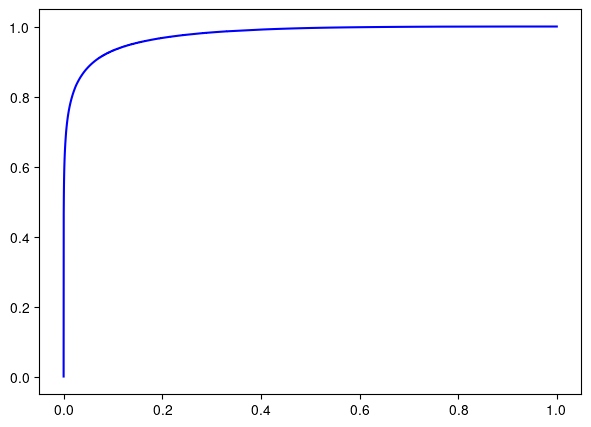

In [12]:
viz.plot_roc_from_csv('../Results/LWIRISEG/roc_plot.csv',csv2_path='../Results/LWIRISEG/classif.csv',output_path='roc_plot.pdf')


In [53]:
viz.plot_training_data('../Results/LWIRISEG/metrics.csv','../paper/figures/metrics_loss.pdf')